In [233]:
# 메모리 변수 모두 제거
all = [var for var in globals() if var[0] != "_"]
for var in all:
    del globals()[var]

# 메모리 변수 확인
#globals()

In [234]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings(action='ignore')

In [235]:
df3 = pd.read_csv('data/메뉴구분3.csv')

In [236]:
df3.head(2)

,일자,밥,국,메인,반찬,구분,국분류,메뉴분류
0,2016-02-01,밥,오징어찌개,쇠불고기,계란찜,중식,찌개,육류
1,2016-02-02,밥,김치찌개,가자미튀김,모둠소세지구이,중식,찌개,해산물


In [237]:
df_lunch_cat = df3.iloc[:1205]
df_dinner_cat = df3.iloc[1205:]

In [238]:
df_lunch_cat['반찬'][1]


'모둠소세지구이'

## 카테고리 리스트화

In [239]:
lunch_menu = []
for i in range(len(df_lunch_cat)):
    lunch_menu.append([df_lunch_cat['국분류'][i], df_lunch_cat['메뉴분류'][i]])   

In [240]:
df_dinner_cat['국분류'][1205]

'국'

In [241]:
df_dinner_cat.reset_index(inplace=True) #

In [242]:
dinner_menu = []
for i in range(len(df_dinner_cat)):
    dinner_menu.append([df_dinner_cat['국분류'][i], df_dinner_cat['메뉴분류'][i]])   

## 점심

In [243]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

te = TransactionEncoder()
te_ary = te.fit(lunch_menu).transform(lunch_menu)
lunch_te = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets_lunch =apriori(lunch_te,min_support=0.001,use_colnames=True)
print(frequent_itemsets_lunch.sort_values('support', ascending=False)[:5])

     support itemsets
0   0.593361      (국)
4   0.540249     (육류)
10  0.326971  (국, 육류)
8   0.224896    (해산물)
5   0.176763     (조류)


In [244]:
frequent_itemsets_lunch['length'] = frequent_itemsets_lunch['itemsets'].apply(lambda x: len(x))   # 개수열 추가
frequent_itemsets_lunch[frequent_itemsets_lunch['length'] >=2] .sort_values('support', ascending=False)[:5] #2개 이상
# support는 자주 나왔던 것들의 조합

,support,itemsets,length
10,0.326971,"(국, 육류)",2
12,0.118672,"(국, 해산물)",2
11,0.112033,"(조류, 국)",2
20,0.086307,"(탕, 육류)",2
19,0.082988,"(찌개, 육류)",2


In [245]:
rules_lunch=association_rules(frequent_itemsets_lunch, metric="lift", min_threshold=1)
rules_lunch.sort_values('lift', ascending=False)[:5]
# lift가 높다는 뜻은 국수가 나오면 꼭 기타종류의 음식이 나오더라

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(국수),(기타),0.067220,0.058091,0.005809,0.086420,1.487654,0.001904,1.031008
7,(기타),(국수),0.058091,0.067220,0.005809,0.100000,1.487654,0.001904,1.036422
10,(기타),(탕),0.058091,0.173444,0.013278,0.228571,1.317840,0.003202,1.071462
11,(탕),(기타),0.173444,0.058091,0.013278,0.076555,1.317840,0.003202,1.019994
15,(해산물),(찌개),0.224896,0.164315,0.047303,0.210332,1.280051,0.010349,1.058274


## 저녁

In [246]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

te = TransactionEncoder()
te_ary = te.fit(dinner_menu).transform(dinner_menu)
dinner_te = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets_dinner =apriori(lunch_te,min_support=0.001,use_colnames=True)
print(frequent_itemsets_dinner.sort_values('support', ascending=False)[:5])

     support itemsets
0   0.593361      (국)
4   0.540249     (육류)
10  0.326971  (국, 육류)
8   0.224896    (해산물)
5   0.176763     (조류)


In [247]:
frequent_itemsets_dinner['length'] = frequent_itemsets_dinner['itemsets'].apply(lambda x: len(x))   # 개수열 추가
frequent_itemsets_dinner[frequent_itemsets_dinner['length'] >=2] .sort_values('support', ascending=False).head(2) #2개 이상
# support는 자주 나왔던 것들의 조합

,support,itemsets,length
10,0.326971,"(국, 육류)",2
12,0.118672,"(국, 해산물)",2


In [248]:
rules_dinner=association_rules(frequent_itemsets_dinner, metric="lift", min_threshold=1)
rules_dinner.sort_values('lift', ascending=False)[:5]
# lift가 높다는 뜻은 국수가 나오면 꼭 기타종류의 음식이 나오더라
# confidence 는 국수중 기타가 포함될 확률
# supoort 는 나올 확률

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(국수),(기타),0.067220,0.058091,0.005809,0.086420,1.487654,0.001904,1.031008
7,(기타),(국수),0.058091,0.067220,0.005809,0.100000,1.487654,0.001904,1.036422
10,(기타),(탕),0.058091,0.173444,0.013278,0.228571,1.317840,0.003202,1.071462
11,(탕),(기타),0.173444,0.058091,0.013278,0.076555,1.317840,0.003202,1.019994
15,(해산물),(찌개),0.224896,0.164315,0.047303,0.210332,1.280051,0.010349,1.058274


## 시각화

In [249]:
df = pd.read_csv('data/train_메뉴제외.csv')

In [250]:
df = df[['일자', '요일', '중식계', '석식계', '중식강수여부', '석식강수여부', '중식기온', '석식기온']]
df.head(2)

,일자,요일,중식계,석식계,중식강수여부,석식강수여부,중식기온,석식기온
0,2016-02-01,월,1039.0,331.0,0.0,0.0,3.0,0.9
1,2016-02-02,화,867.0,560.0,0.0,0.0,1.7,2.4


In [251]:
df_lunch = pd.concat([df,df_lunch_cat[['국분류', '메뉴분류']]],axis=1)

In [252]:
df_lunch.head(2)

,일자,요일,중식계,석식계,중식강수여부,석식강수여부,중식기온,석식기온,국분류,메뉴분류
0,2016-02-01,월,1039.0,331.0,0.0,0.0,3.0,0.9,찌개,육류
1,2016-02-02,화,867.0,560.0,0.0,0.0,1.7,2.4,찌개,해산물


In [253]:
avg = np.average(df_lunch['중식계']) ##중식의 평균 식수량을 구한다

In [254]:
np.average(df_lunch[(df_lunch.국분류=='국수') & (df_lunch.메뉴분류 == '육류')]['중식계']) # 국수와 육류가 나오면 중식계의 평균이 늘어납니다. 하하
#이거를 그래프로 표현을 할 수 있을가 모르겠다리

933.6792452830189

In [255]:
df_lunch['중식계'].groupby(df_lunch['국분류']).mean()

국분류
국     898.661538
국수    928.148148
스프    641.000000
찌개    887.424242
탕     852.334928
Name: 중식계, dtype: float64

In [256]:
df_lunch['중식계'].groupby(df_lunch['메뉴분류']).mean()

메뉴분류
기타     873.057143
육류     925.913978
조류     870.065728
해산물    825.258303
Name: 중식계, dtype: float64

In [257]:
df_lunch_mean = df_lunch['중식계'].groupby([df_lunch.중식강수여부, df_lunch['메뉴분류'], df_lunch['국분류']]).mean()

In [258]:
df_lunch_mean = pd.DataFrame(df_lunch_mean)

In [259]:
df_lunch_mean

중식계
중식강수여부 메뉴분류 국분류             
0.0    기타   국     857.261905
            국수   1034.200000
            스프    586.000000
            찌개    884.000000
            탕     876.187500
       육류   국     923.059155
            국수    941.108696
            찌개    950.921348
            탕     869.969388
       조류   국     894.322581
            국수    994.400000
            찌개    816.638889
            탕     777.875000
       해산물  국     821.439394
            국수    886.533333
            스프    696.000000
            찌개    795.490566
            탕     831.500000
1.0    기타   국    1128.000000
            국수    776.500000
       육류   국     988.051282
            국수    884.857143
            찌개   1004.363636
            탕    1021.333333
       조류   국     899.363636
            찌개   1164.500000
            탕     981.000000
       해산물  국     906.454545
            국수    701.000000
            찌개    872.250000
            탕     831.000000

In [260]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

In [329]:
df_lunch_mean.reset_index('국분류').index.to_numpy()

array([(0.0, '기타'), (0.0, '기타'), (0.0, '기타'), (0.0, '기타'), (0.0, '기타'),
       (0.0, '육류'), (0.0, '육류'), (0.0, '육류'), (0.0, '육류'), (0.0, '조류'),
       (0.0, '조류'), (0.0, '조류'), (0.0, '조류'), (0.0, '해산물'), (0.0, '해산물'),
       (0.0, '해산물'), (0.0, '해산물'), (0.0, '해산물'), (1.0, '기타'), (1.0, '기타'),
       (1.0, '육류'), (1.0, '육류'), (1.0, '육류'), (1.0, '육류'), (1.0, '조류'),
       (1.0, '조류'), (1.0, '조류'), (1.0, '해산물'), (1.0, '해산물'), (1.0, '해산물'),
       (1.0, '해산물')], dtype=object)

In [332]:
df_lunch_mean.loc[0.0, '기타'] # 다중인덱스 인덱싱 하는법

,중식계
국분류,
국,857.261905
국수,1034.200000
스프,586.000000
찌개,884.000000
탕,876.187500


In [322]:
df_lunch_mean.index.to_numpy()[0][:2]

(0.0, '기타')

In [270]:
#df_lunch_mean.plot(figsize=(40,10), xticks=range(len(df_lunch_mean)))

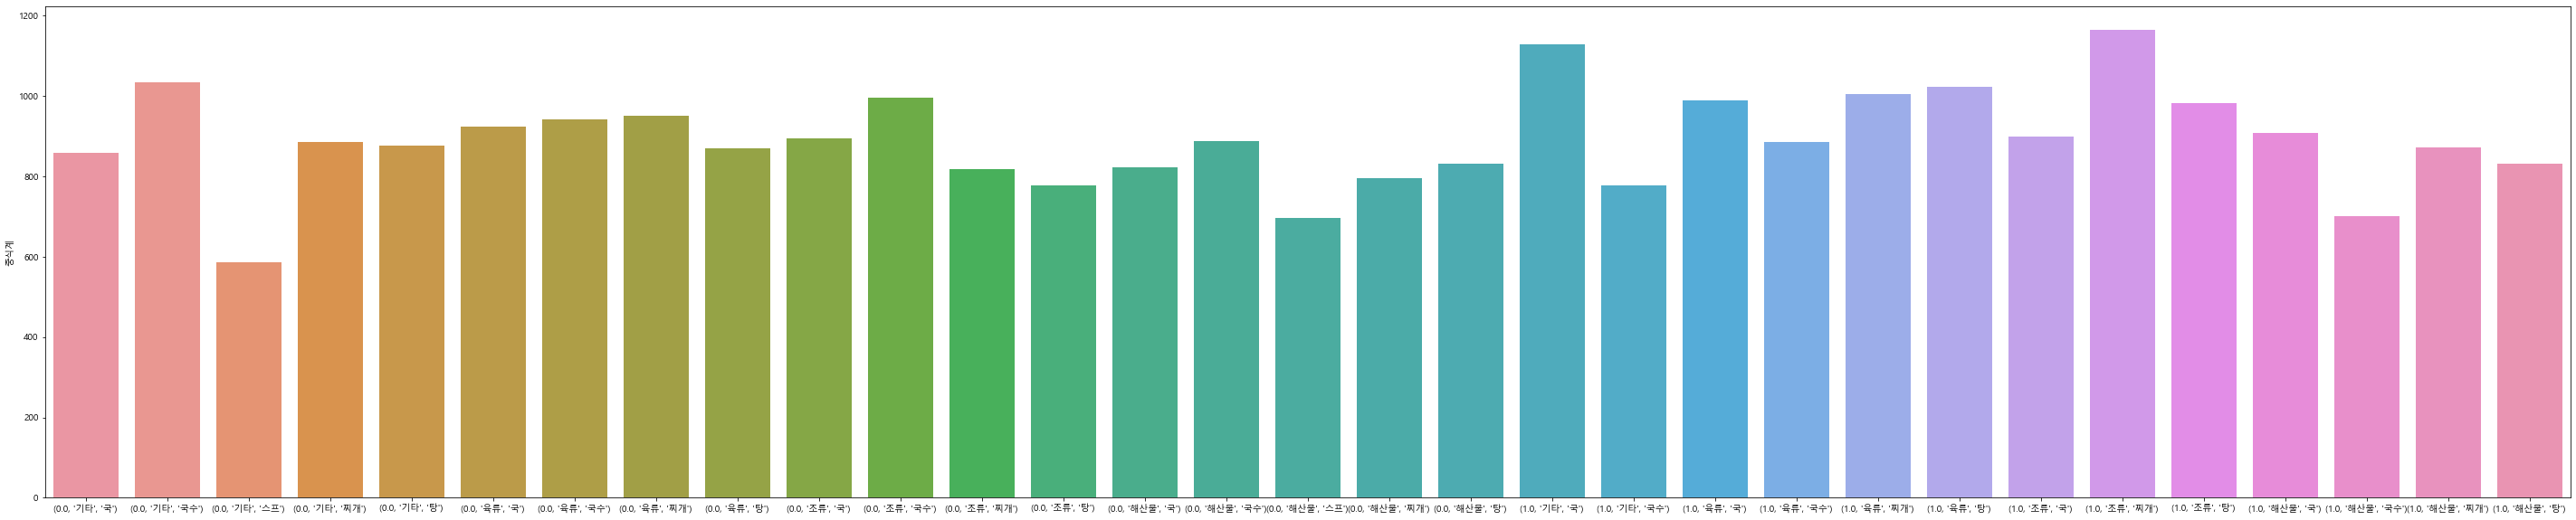

In [272]:
plt.figure(figsize=(50,10))
sns.barplot(data=df_lunch_mean,x=df_lunch_mean.index.to_numpy(), y='중식계')

plt.show()

## 저녁

In [264]:
df_dinner = pd.merge(df, df_dinner_cat, on='일자', how='left')
df_dinner.isna().sum().sum()

352

In [265]:
#df_dinner.fillna(0,inplace=True)
df_dinner.dropna()

,일자,요일,중식계,석식계,중식강수여부,석식강수여부,중식기온,석식기온,index,밥,국,메인,반찬,구분,국분류,메뉴분류
0,2016-02-01,월,1039.0,331.0,0.0,0.0,3.0,0.9,1205.0,쌀밥/잡곡밥,육개장,자반고등어구이,두부조림,석식,국,해산물
1,2016-02-02,화,867.0,560.0,0.0,0.0,1.7,2.4,1206.0,콩나물밥*양념장,어묵국,유산슬,아삭고추무침,석식,국,해산물
2,2016-02-03,수,1017.0,573.0,0.0,0.0,3.2,3.0,1207.0,쌀밥/잡곡밥,청국장찌개,황태양념구이,고기전,석식,찌개,해산물
3,2016-02-04,목,978.0,525.0,0.0,0.0,3.7,4.0,1208.0,미니김밥*겨자장,우동,멕시칸샐러드,군고구마,석식,국수,기타
4,2016-02-05,금,925.0,330.0,0.0,0.0,6.3,5.7,1209.0,쌀밥/잡곡밥,차돌박이찌개,닭갈비,감자소세지볶음,석식,찌개,육류
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,1093.0,421.0,0.0,0.0,4.8,6.7,2361.0,김치볶음밥,미니쫄우동*맛살튀김,브로콜리깨소스무침,계란후라이,석식,국수,기타
1201,2021-01-21,목,832.0,353.0,0.0,0.0,9.1,9.6,2362.0,흑미밥,쇠고기무국,삼치양념구이,비엔나채소볶음,석식,국,해산물
1202,2021-01-22,금,579.0,217.0,0.0,0.0,8.4,8.0,2363.0,흑미밥,수제비국,수제맛쵸킹탕수육,유부채소겨자냉채,석식,탕,육류
1203,2021-01-25,월,1145.0,502.0,0.0,0.0,11.3,10.2,2364.0,흑미밥,열무된장국,장어강정*데리야끼소스,깻잎쌈*생강채,석식,국,해산물


In [266]:
df_dinner_mean = df_dinner['석식계'].groupby([df_dinner.중식강수여부, df_dinner['메뉴분류'], df_dinner['국분류']]).mean()

In [267]:
df_dinner_mean = pd.DataFrame(df_dinner_mean)

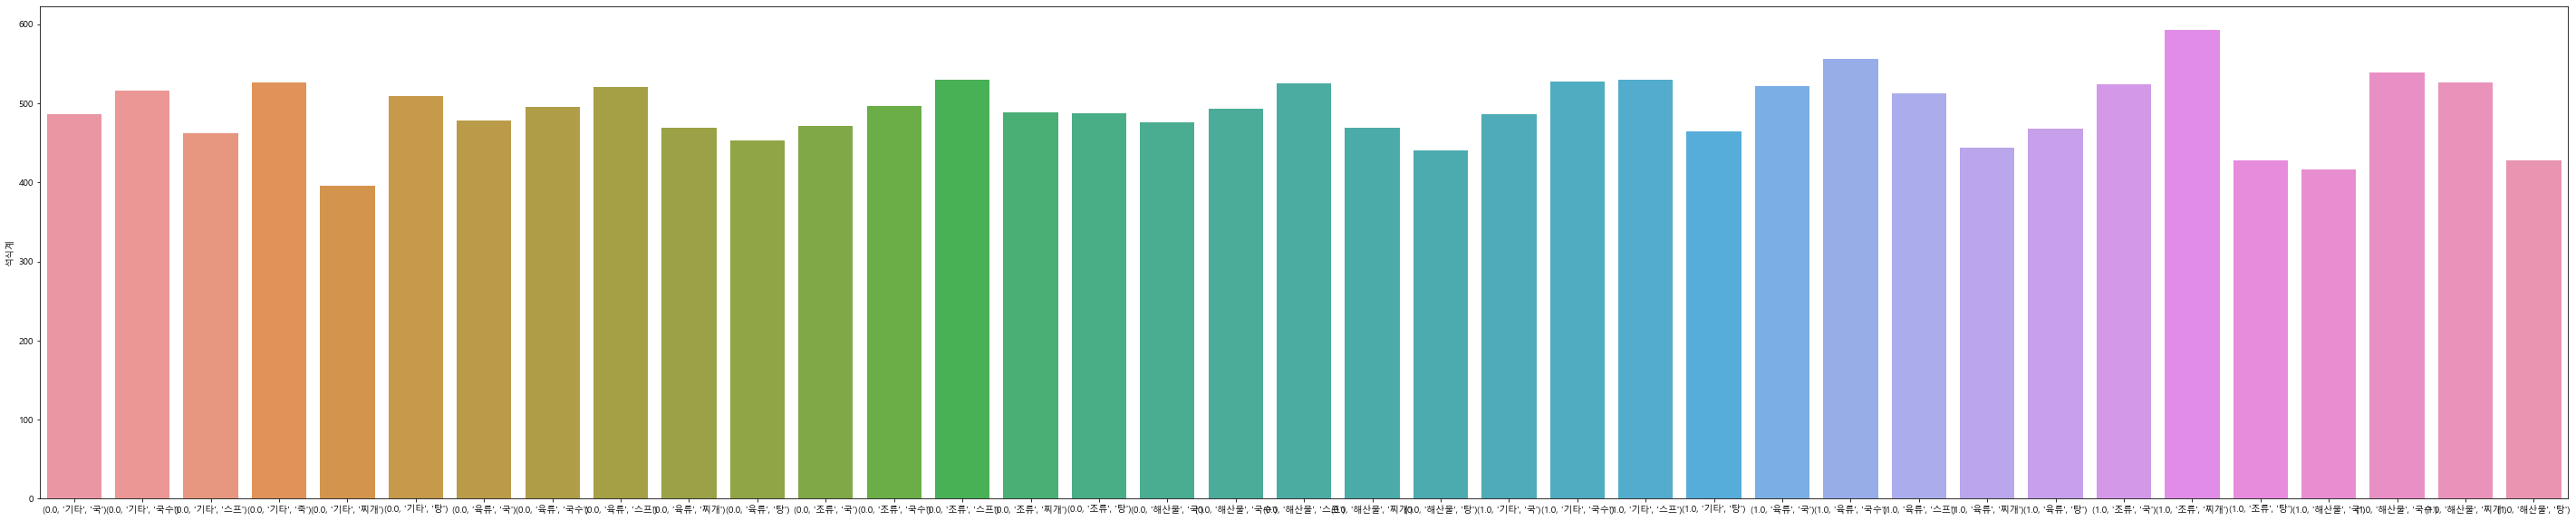

In [268]:
plt.figure(figsize=(50,10))
sns.barplot(data=df_dinner_mean,x=df_dinner_mean.index.to_numpy(), y='석식계')

plt.show()

- 이제 여기서 연관도 분석 결과와 합쳐서 보면된다.